In [2]:
import UsefulFunctions as uf
import numpy as np
import pandas as pd
import pygmt
import json
pygmt.config(MAP_FRAME_TYPE="graph")
pygmt.config(FORMAT_GEO_MAP="ddd.x")

with open('Data/Interior Crustal/Interior Community Data.json') as json_file:
    comm_dict = json.load(json_file)

eq_dict = {'2': uf.Earthquake('Data/Down Dip/grids/2_grid.xml'),
           '5': uf.Earthquake('Data/Down Dip/grids/5_grid.xml'),
           '7': uf.Earthquake('Data/Down Dip/grids/7_grid.xml'),
           # '10': uf.Earthquake('Data/Down Dip/grids/10_grid.xml'),
           # '13': uf.Earthquake('Data/Down Dip/grids/13_grid.xml'),
           }

cities = [(-150.1066, 62.3209, 'Talkeetna'),
          (-149.4411, 61.5809, 'Wasilla'),
          (-149.1146, 61.5994, 'Palmer'),
          (-149.8997, 61.2176, 'Anchorage'),
          (-151.0572, 60.4864, 'Soldotna'),
          (-151.5299, 59.6481, 'Homer'),
          (-149.4421, 60.1048, 'Seward'),
          (-146.3499, 61.1309, 'Valdez'),
          (-145.5340, 62.1081, 'Glennallen')]

cmap = [(255, 255, 255),
        (191, 204, 255),
        (160, 230, 255),
        (128, 255, 255),
        (122, 255, 147),
        (255, 255, 0),
        (255, 200, 0),
        (255, 145, 0),
        (255, 0, 0),
        (200, 0, 0)]
mmi_rng = range(1, 11)


Start of Parsing for Data/Down Dip/grids/2_grid.xml
   ~~Detection stats~~
    Used a maximum azimuthal gap of 300 degrees and minimum station vector angle of 30 km
    Number of stations needed: 4
    Detection Time: 23.90501627414686
    Azimuthal Gap: 126.22367097337207
    Max Vector Angle: 58.674261811497324
    Maximum Epicentral Distance: 79.56997963860356
Finished parsing grid.xml for: M7.8, SlabSection2, at 2022-08-04T21:29:29 (ID:SlabSection2)
Start of Parsing for Data/Down Dip/grids/5_grid.xml
   ~~Detection stats~~
    Used a maximum azimuthal gap of 300 degrees and minimum station vector angle of 30 km
    Number of stations needed: 4
    Detection Time: 10.390471382105424
    Azimuthal Gap: 130.02708948798244
    Max Vector Angle: 80.78751311817736
    Maximum Epicentral Distance: 51.628669272955044
Finished parsing grid.xml for: M7.8, SlabSection5, at 2022-08-04T21:29:29 (ID:SlabSection5)
Start of Parsing for Data/Down Dip/grids/7_grid.xml
   ~~Detection stats~~
    Used

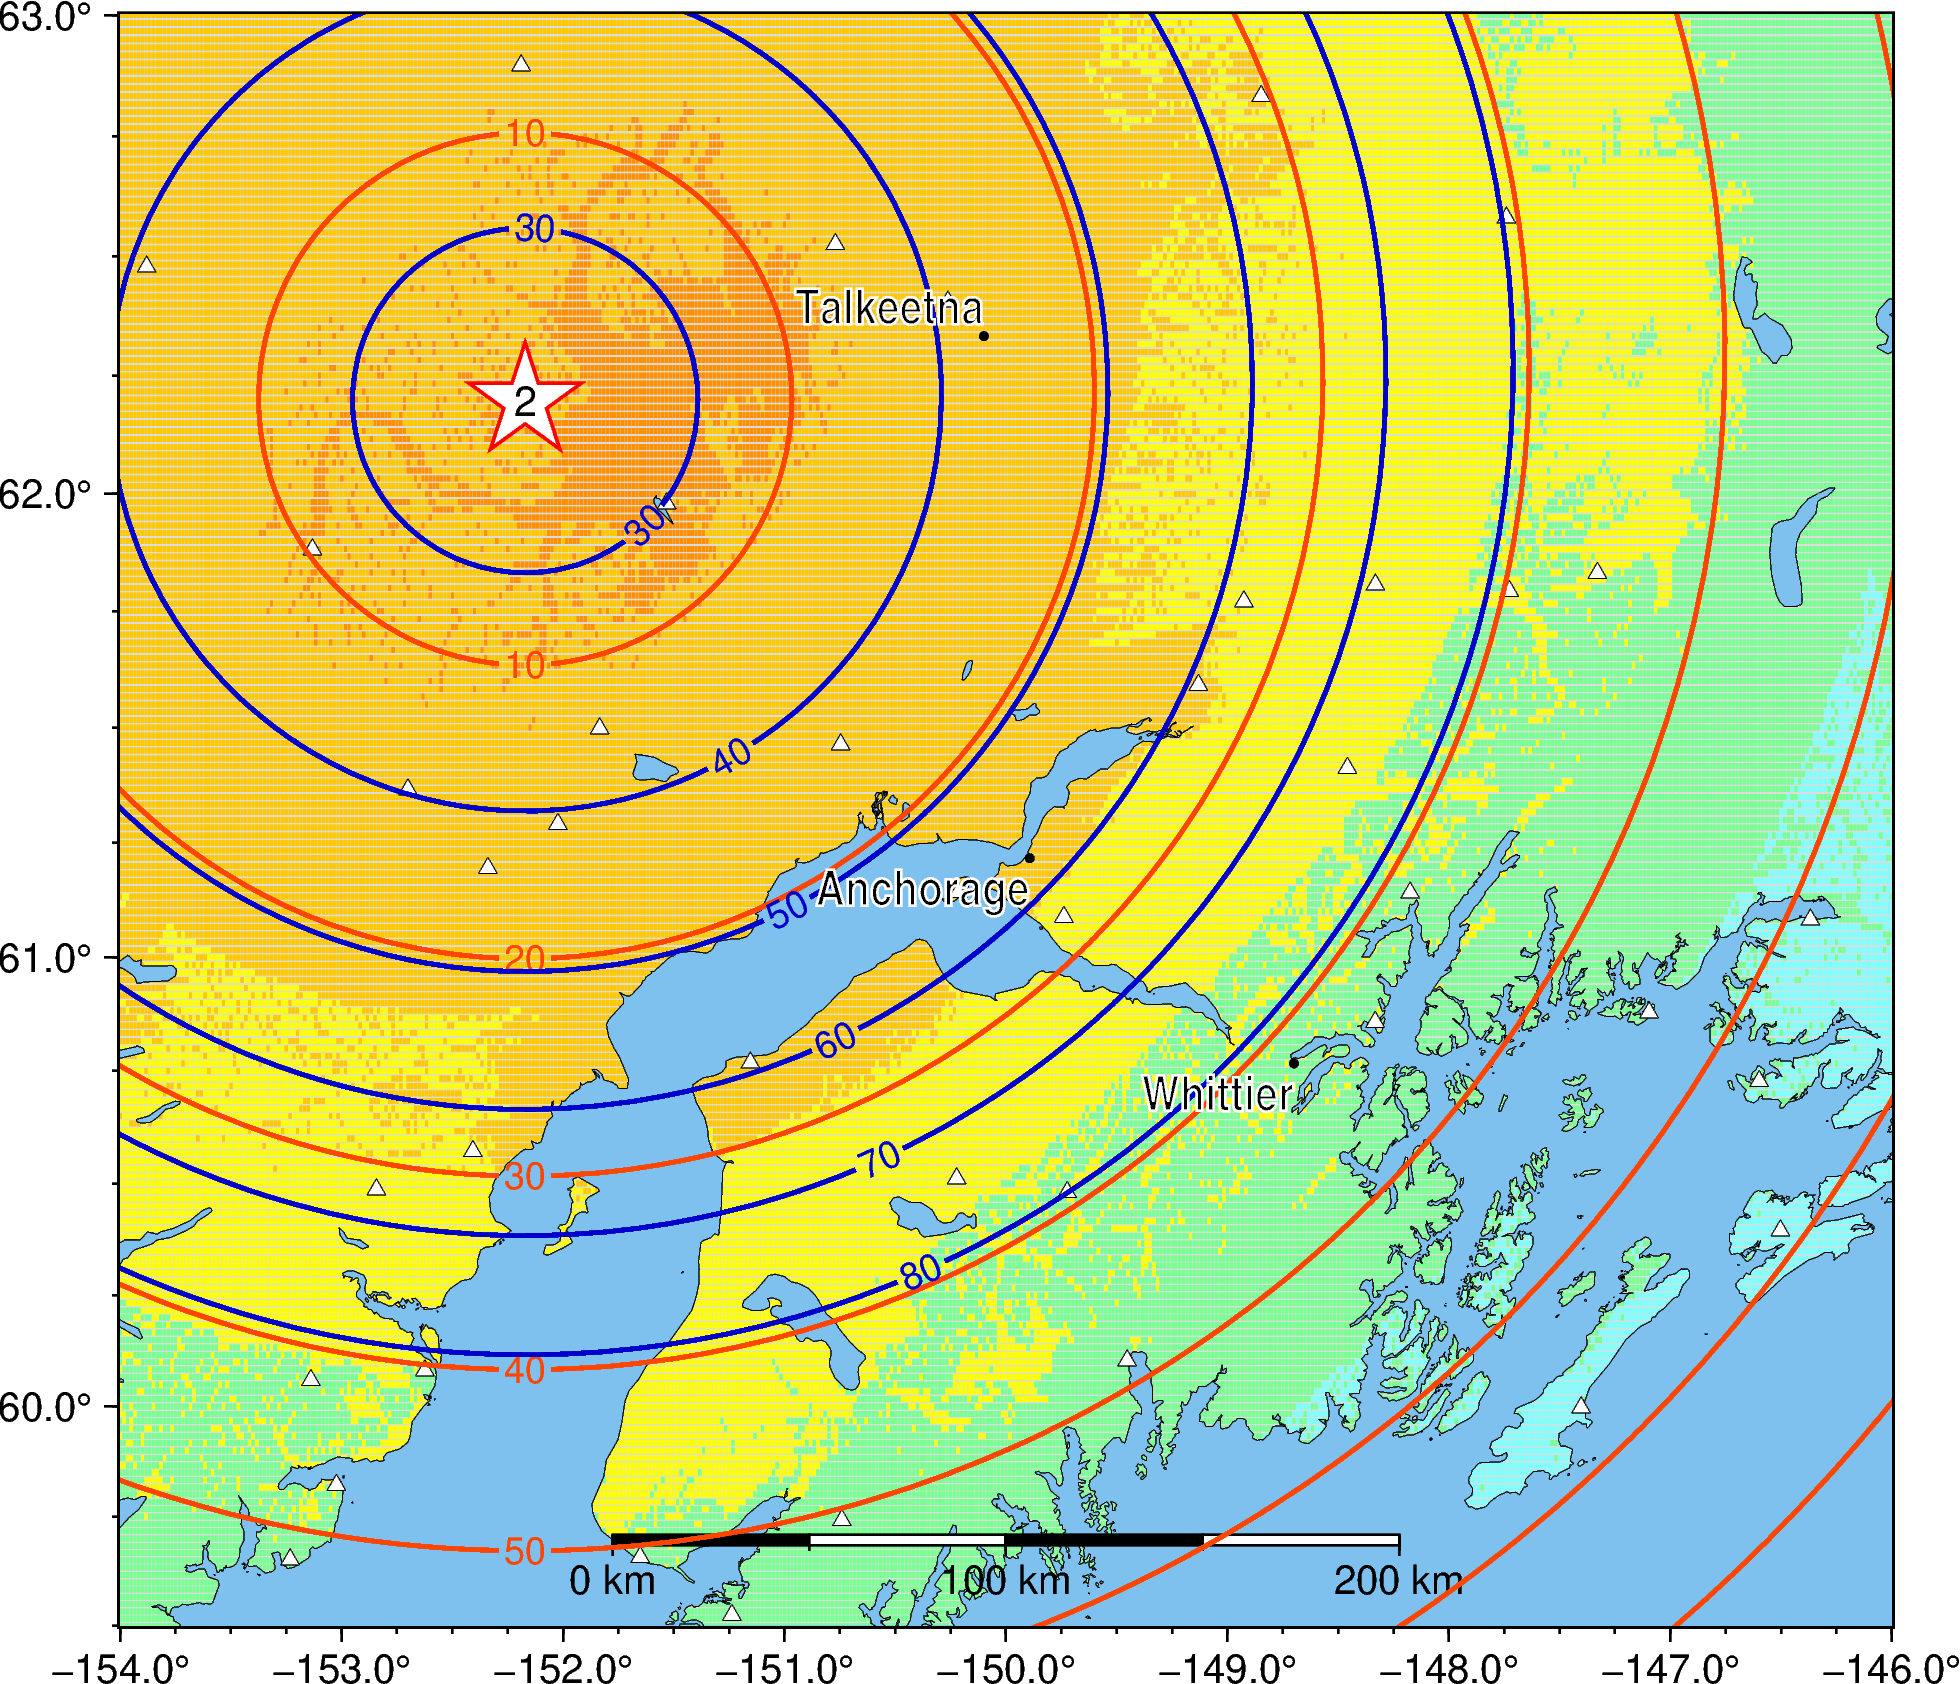

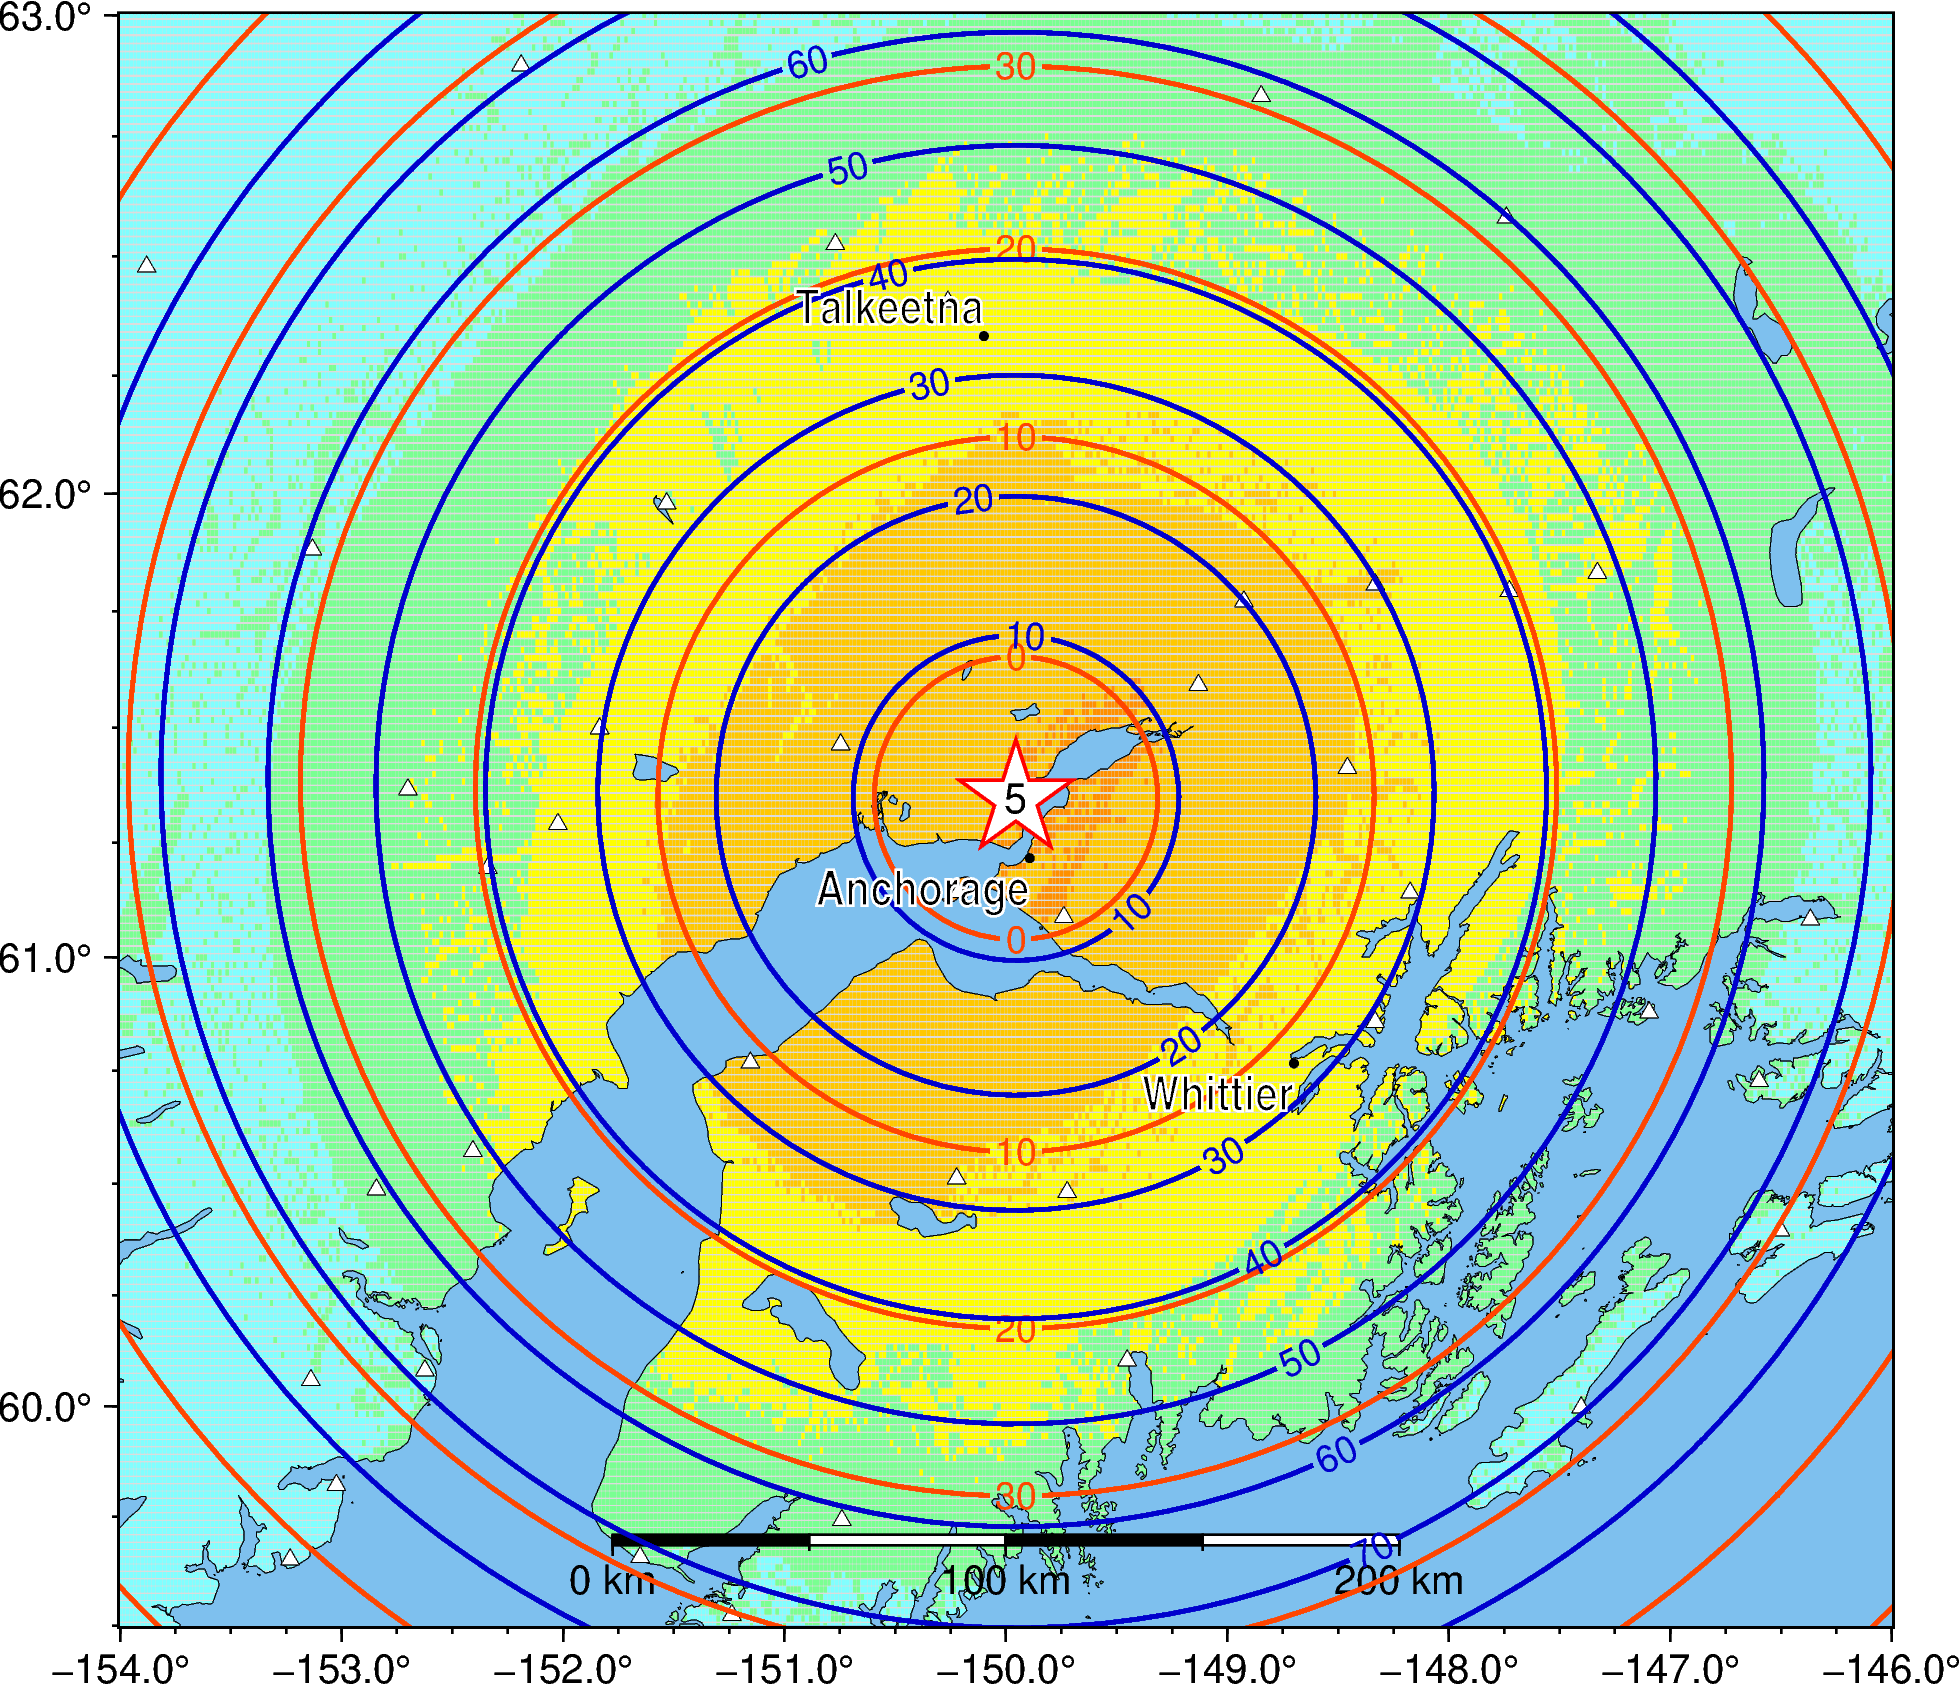

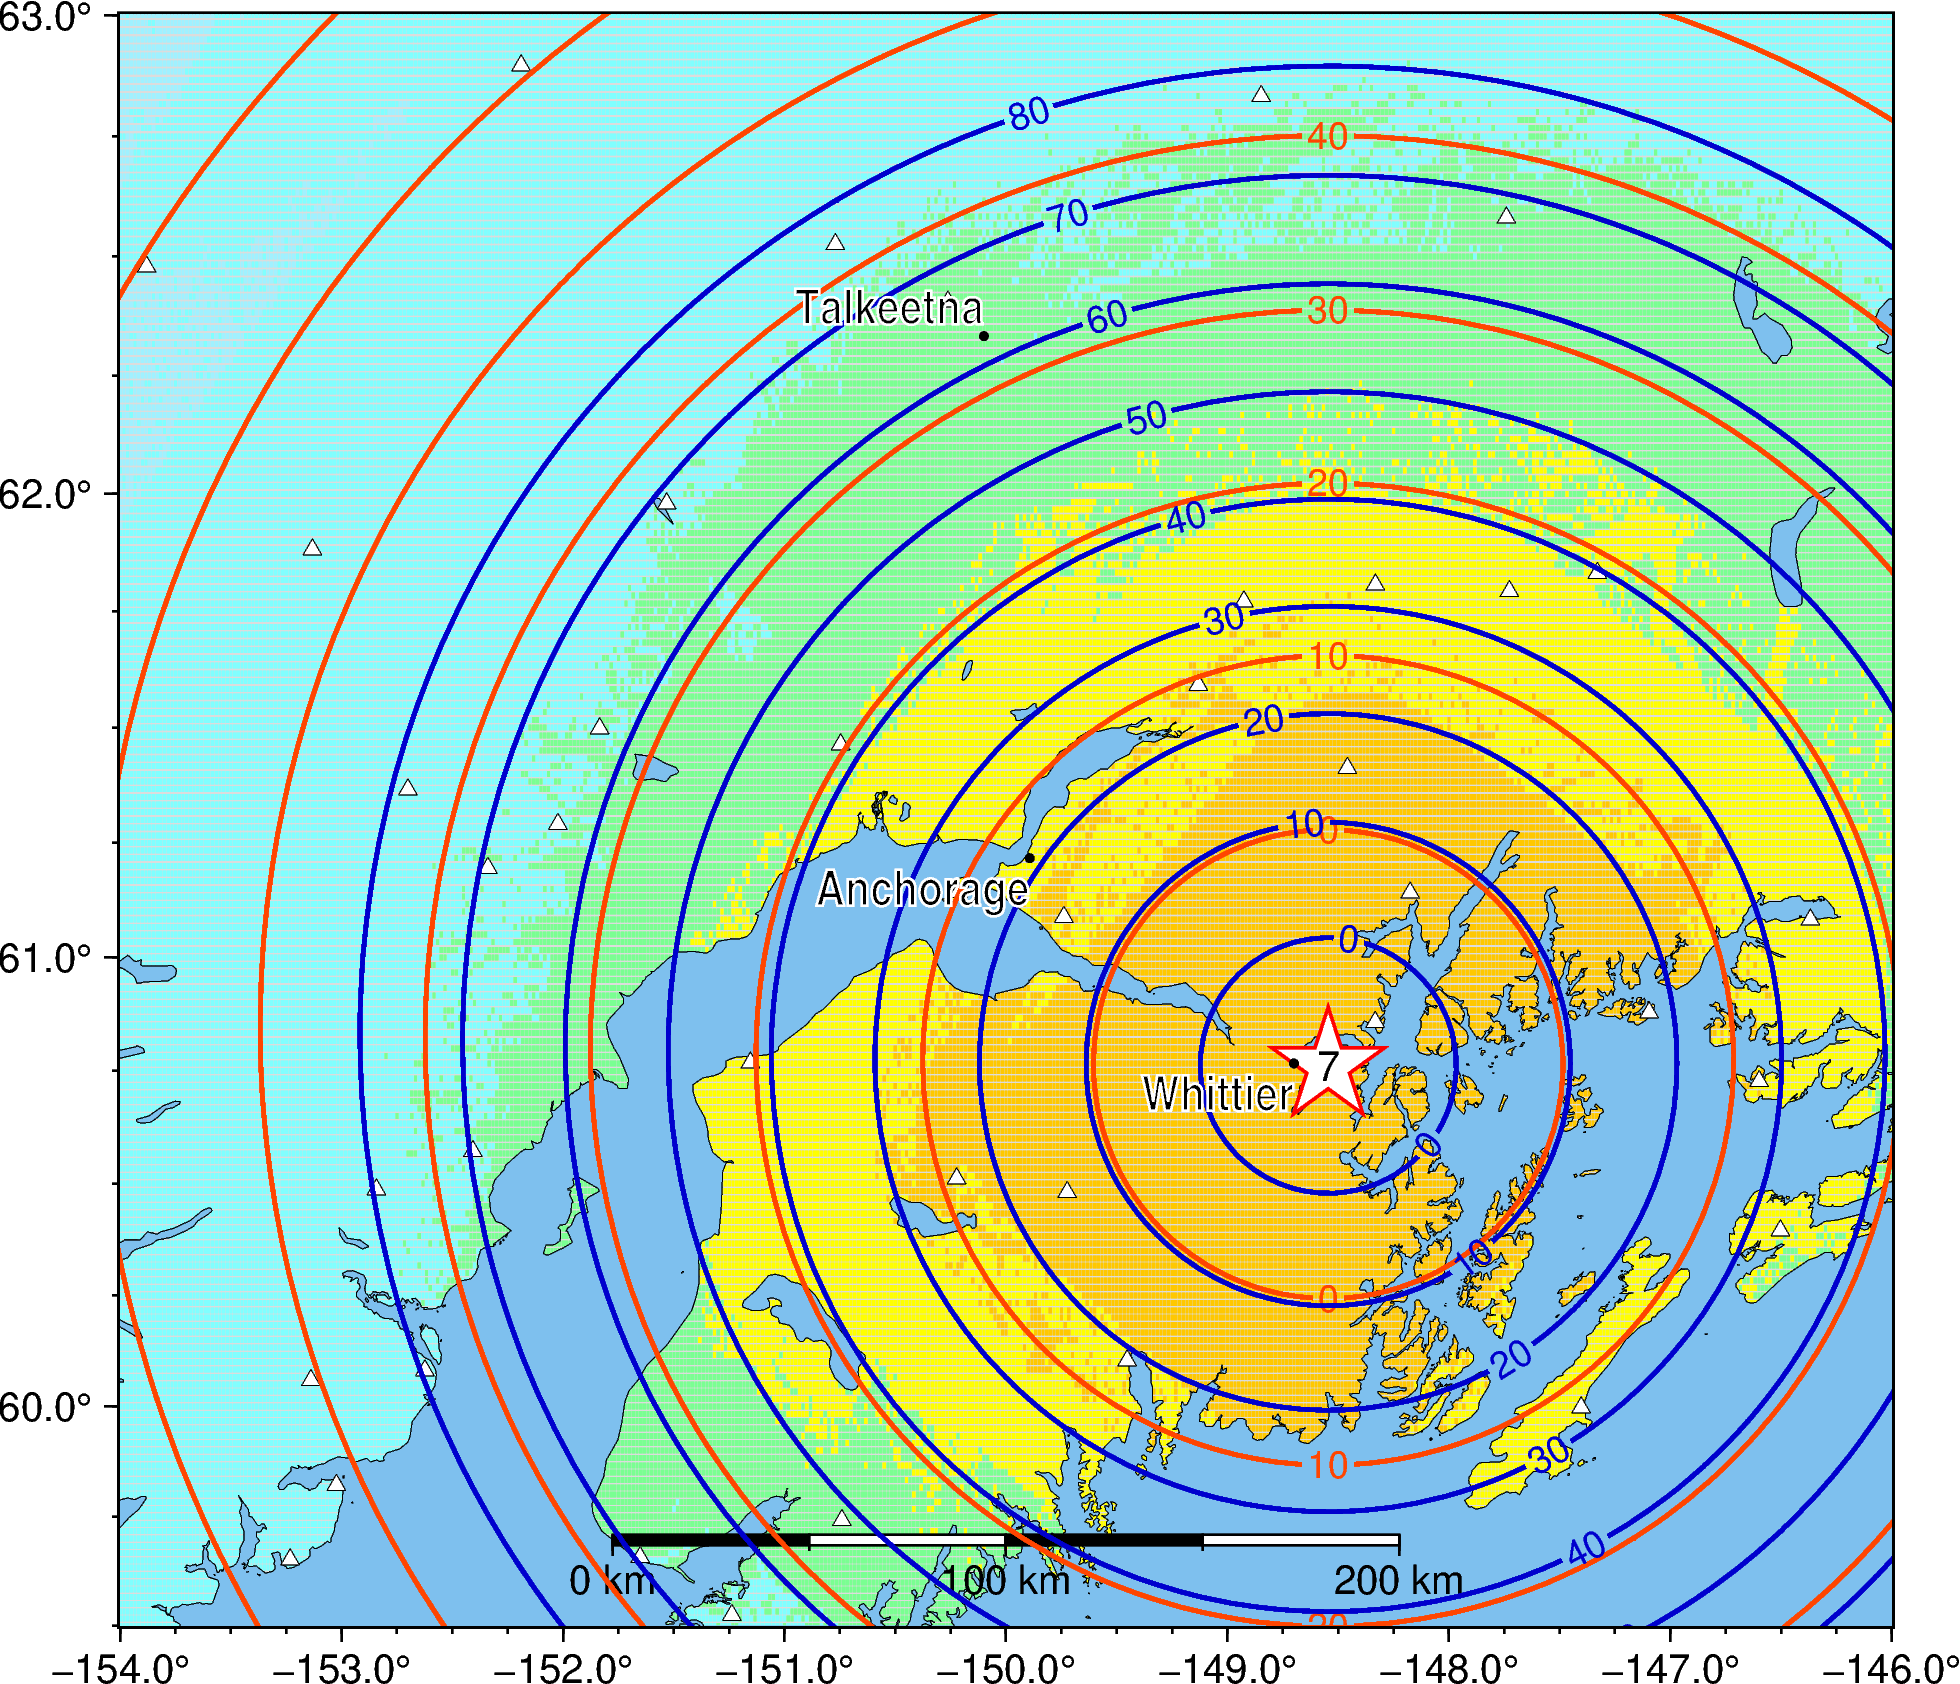

In [4]:

cpt = pygmt.makecpt(cmap="Data/mmi.cpt", series=[1, 11])
# title = r"Anchorage 2018 Estimated WT"
bounds = '206/59.5/214/63+r'
coast_border = "a/0.25p,black"
shorelines = "0.1p,black"
# frame = ["a", f'WSne+t"{title}"']
# relief = pygmt.datasets.load_earth_relief(resolution="03s", region=[206, 215, 59, 63.5], registration='gridline')
levels = '0,10,20,30,40,50,60,70,80'
starsize = 1.0
numsize = 0.35
ruptpen = 0.5
starpen = 0.75
planes = {}
for k, eq in eq_dict.items():
    line_lon = eq.event['lon']
    line_lonleft = eq.event['lon'] - 4
    line_lonright = eq.event['lon'] + 4
    line_toplat = eq.event['lat']  + 5
    line_botlat = eq.event['lat'] - 5
    fig = pygmt.Figure()
    # fig.basemap(region=[160, 240, 40, 75], projection='M15c', frame=True)
    fig.basemap(region=bounds, projection='M15c')
    fig.coast(shorelines=shorelines, borders=coast_border, water='skyblue2',
              land='gainsboro')  # draw coast over datawater='skyblue'
    # fig.grdimage(grid=relief, projection='M15c', region=bounds, cmap='gray')
    fig.plot(x=eq.lons.flat,
             y=eq.lats.flat,
             color=eq.mmi.flat,
             cmap=True,
             style='r.024/.047c',
             )

    fig.coast(shorelines=shorelines, water='skyblue2', map_scale='n0.5/0.05+w200+f+u')  # draw coast over data
    fig.plot(  # Plot seismic stations as triangles
        x=uf.ActiveBBs['lon'],
        y=uf.ActiveBBs['lat'],
        style='t+0.18c',
        color='white',
        pen='0.1p,black',
    )
    fig.plot(x=eq.event['lon'],
             y=eq.event['lat'],
             style=f'a{starsize}c',
             color='white',
             pen=f'{starpen}p,red')
    fig.plot(
        x=eq.event['lon'],
        y=eq.event['lat'],
        style=f'l{numsize}c+t"{k}"',
        color='black'
    )
    # fig.contour(x=anc.lons.flat,
    #             y=anc.lats.flat,
    #             z=anc.mmi.flat,
    #             projection='M15c',
    #             region=bounds,
    #             levels=1,
    #             annotation=1,
    #             pen='red')
    # under fast
    # fig.contour(x=eq.lons.flat,
    #             y=eq.lats.flat,
    #             z=eq.warning_times_s.flat,
    #             projection='M15c',
    #             region=bounds,
    #             levels=levels,
    #             # annotation=levels,
    #             pen='2,black,--',
    #             label_placement=f'l{line_lon}/{line_toplat}/{line_lon}/{line_botlat}'
    #             )
    # over fast
    fig.contour(x=eq.lons.flat,
                y=eq.lats.flat,
                z=eq.warning_times_s.flat,
                projection='M15c',
                region=bounds,
                levels=levels,
                annotation=levels,
                pen='1,orangered1',
                label_placement=f'l{line_lon}/{line_toplat}/{line_lon}/{line_botlat}'
                )
    
    #under slow
    # fig.contour(x=eq.lons.flat,
    #             y=eq.lats.flat,
    #             z=eq.warning_times_slow.flat,
    #             projection='M15c',
    #             region=bounds,
    #             levels=levels,
    #             # annotation=levels,
    #             pen='2,black,--',
    #             label_placement=f'l{line_lon}/{line_toplat}/{line_lonright}/{line_botlat}'
    #             )
    #over slow
    fig.contour(x=eq.lons.flat,
                y=eq.lats.flat,
                z=eq.warning_times_slow.flat,
                projection='M15c',
                region=bounds,
                levels=levels,
                annotation=levels,
                pen='1,mediumblue',
                label_placement=f'l{line_lonleft}/{line_toplat}/{line_lonright}/{line_botlat}'
                )
    
    # plot communities
    for name, data in comm_dict.items():
        fig.plot(
            x=data['latlon'][1],
            y=data['latlon'][0],
            style='c0.08c',
            color='black'
        )
        if name.lower() in ['anchorage', 'whittier']:
            corner = 'TR'
            adjust = -0.025
        else:
            corner = 'BR'
            adjust = 0.025
        fig.text(
            x=data['latlon'][1],
            y=data['latlon'][0] + adjust,
            text=name,
            font='12p,Helvetica-Narrow-Bold,black,=0.45p,white',
            justify=corner
        )

    # fig.colorbar(position="JBC+o1c/0c+w10c/0.3c+mc")
    fig.savefig(f'Figures/Down Dip/WT Contours/{k}_map_ranges.pdf', dpi=700)
    fig.savefig(f'Figures/Down Dip/WT Contours/{k}_map_ranges.png', dpi=700)
    fig.show()

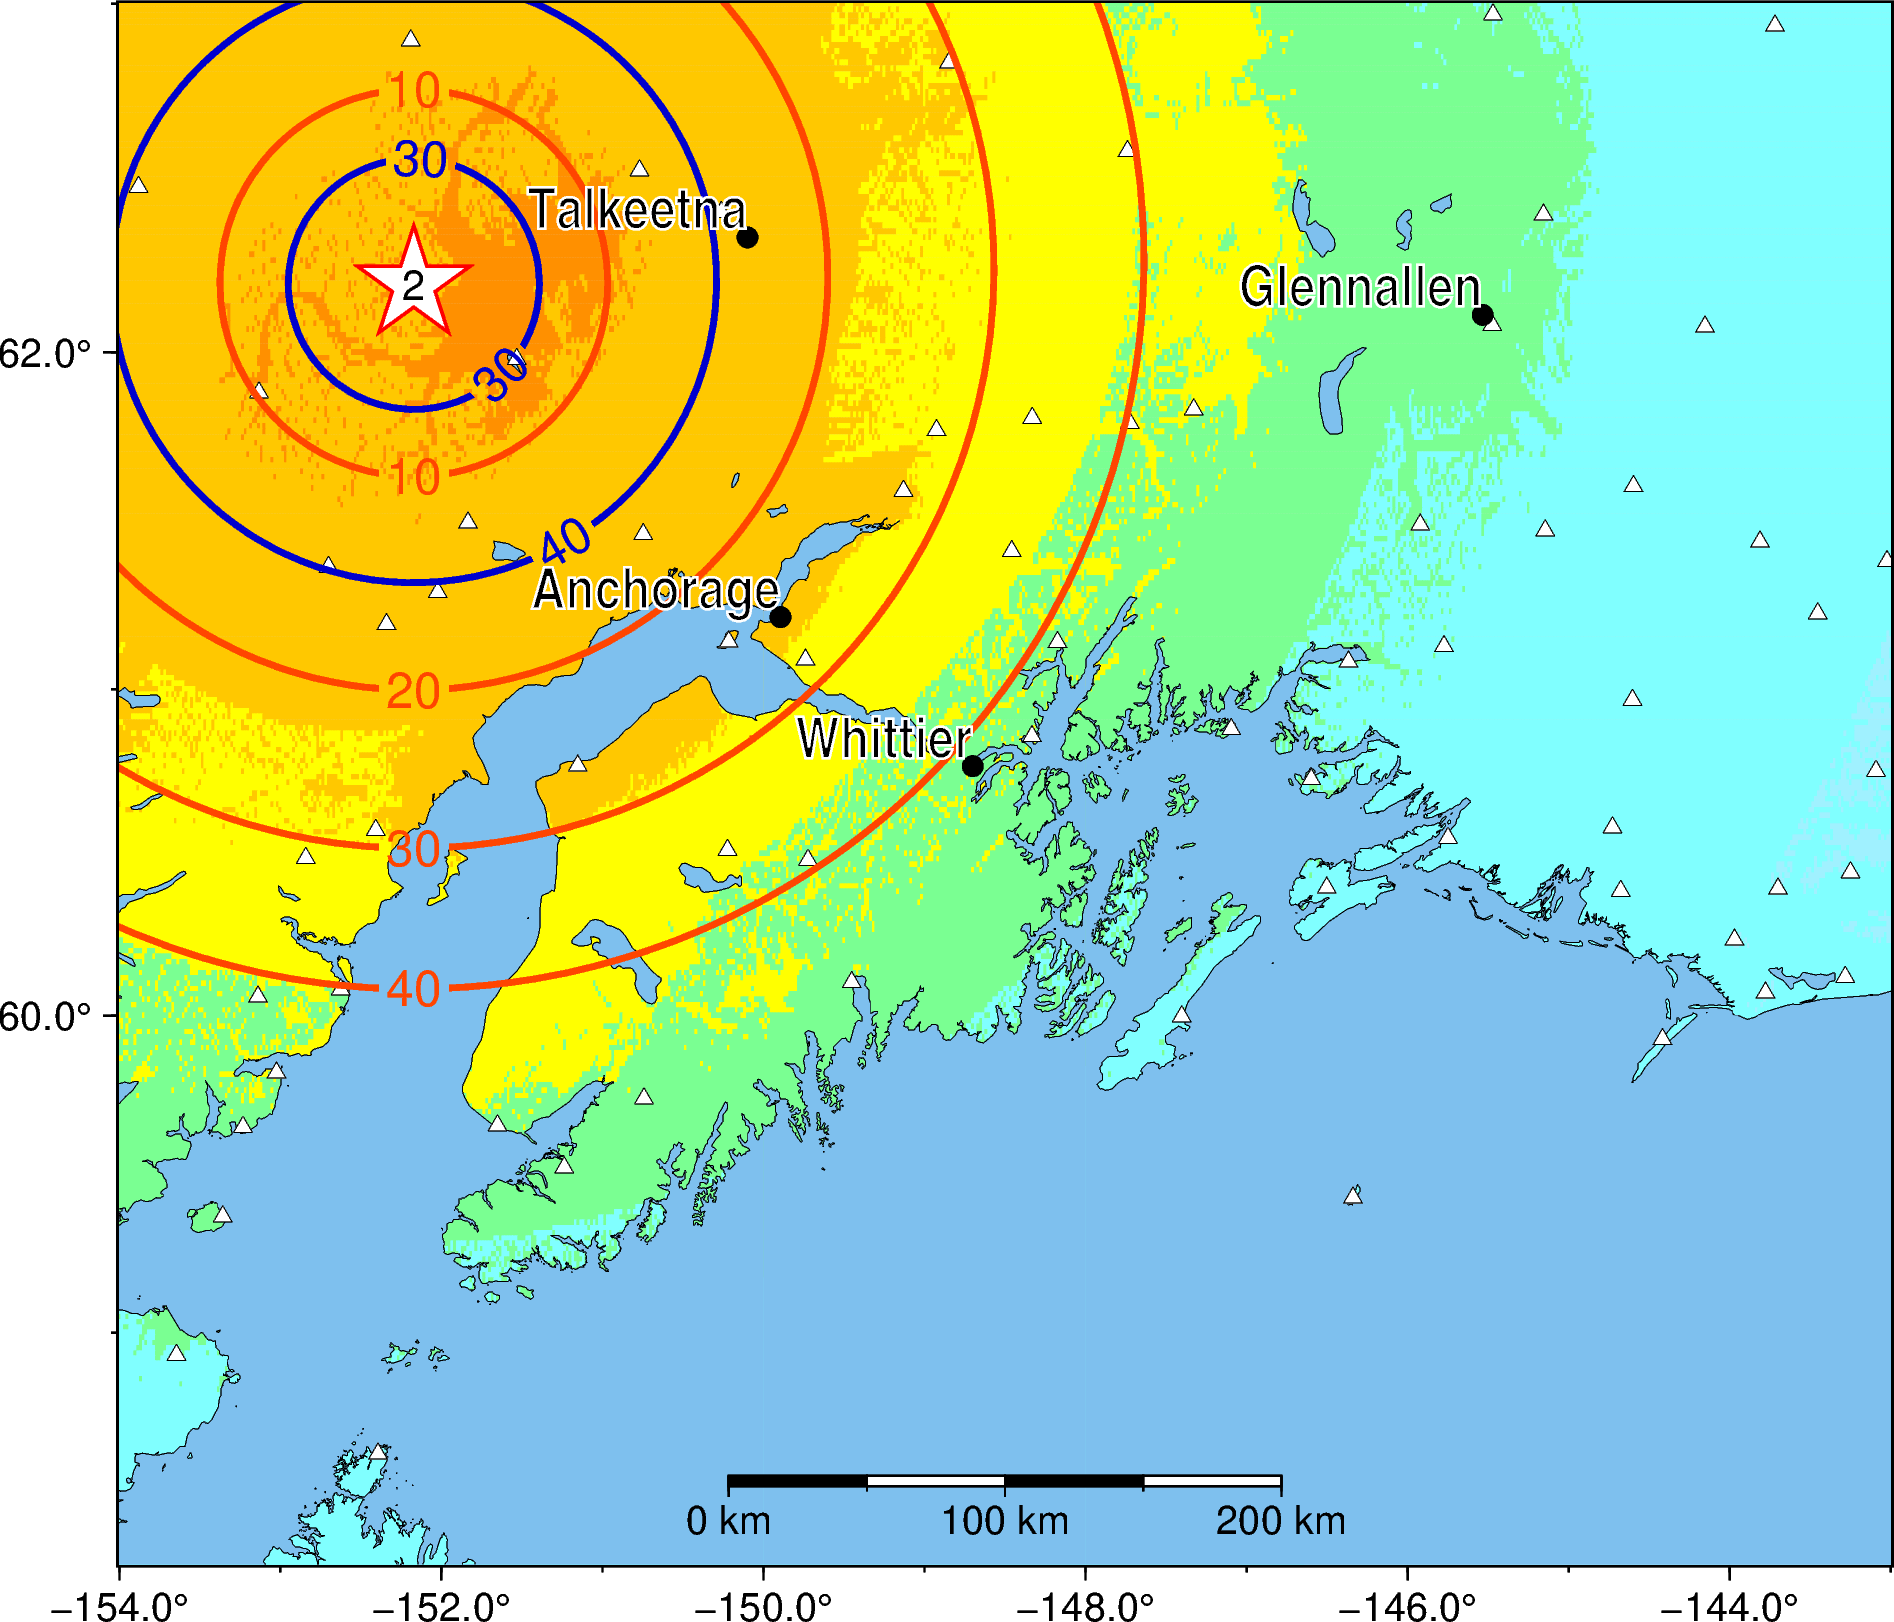

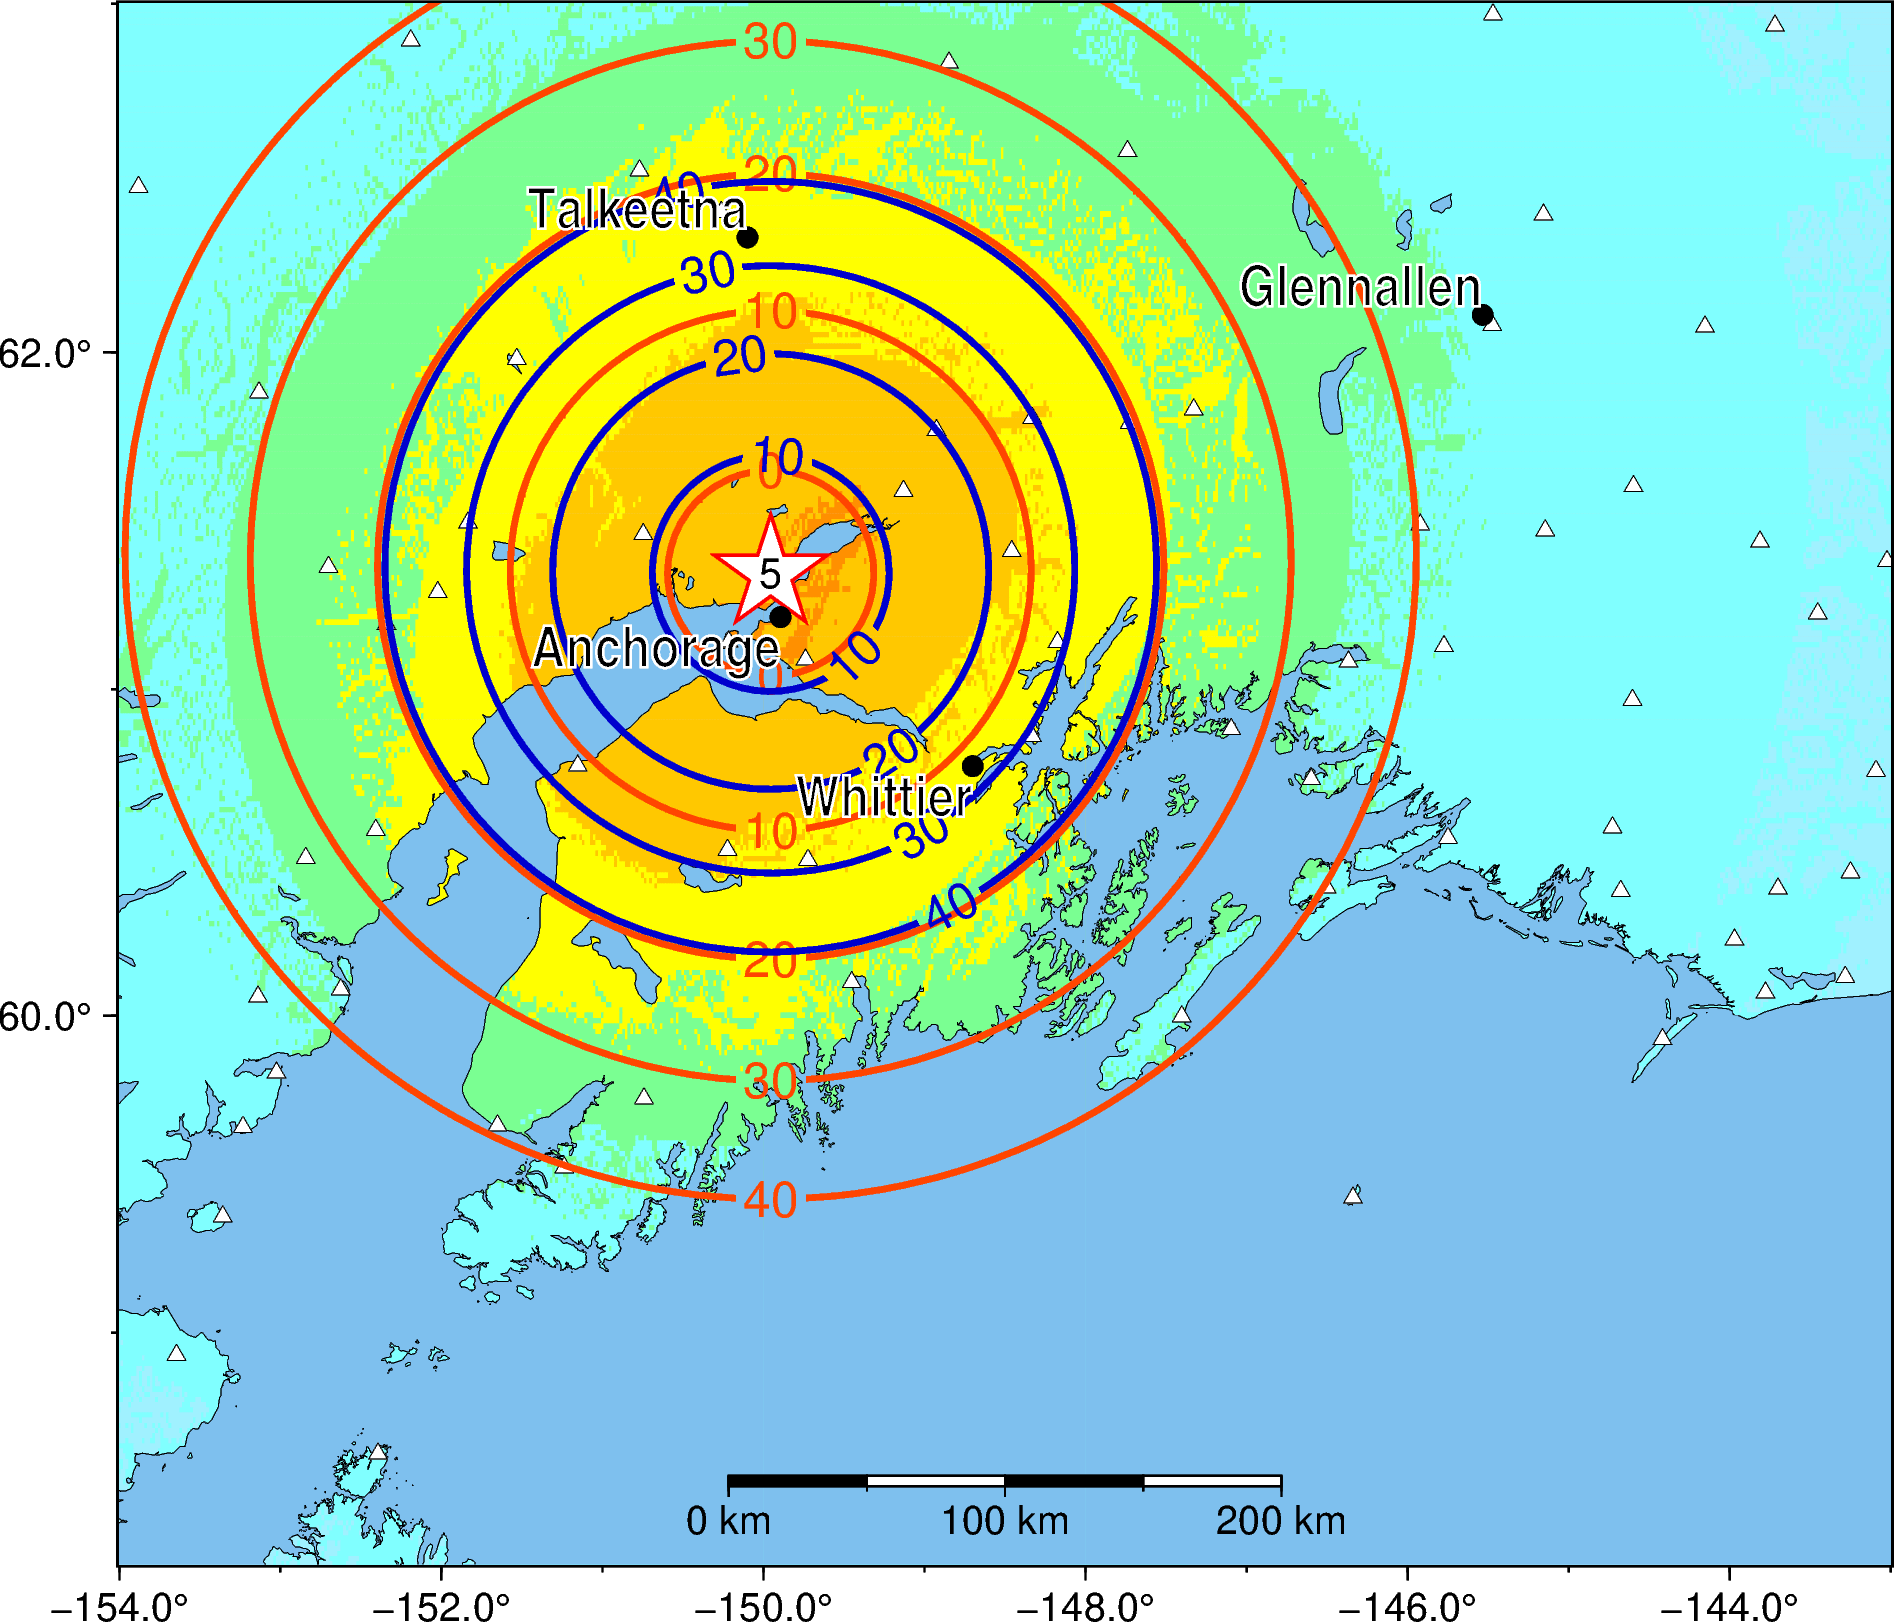

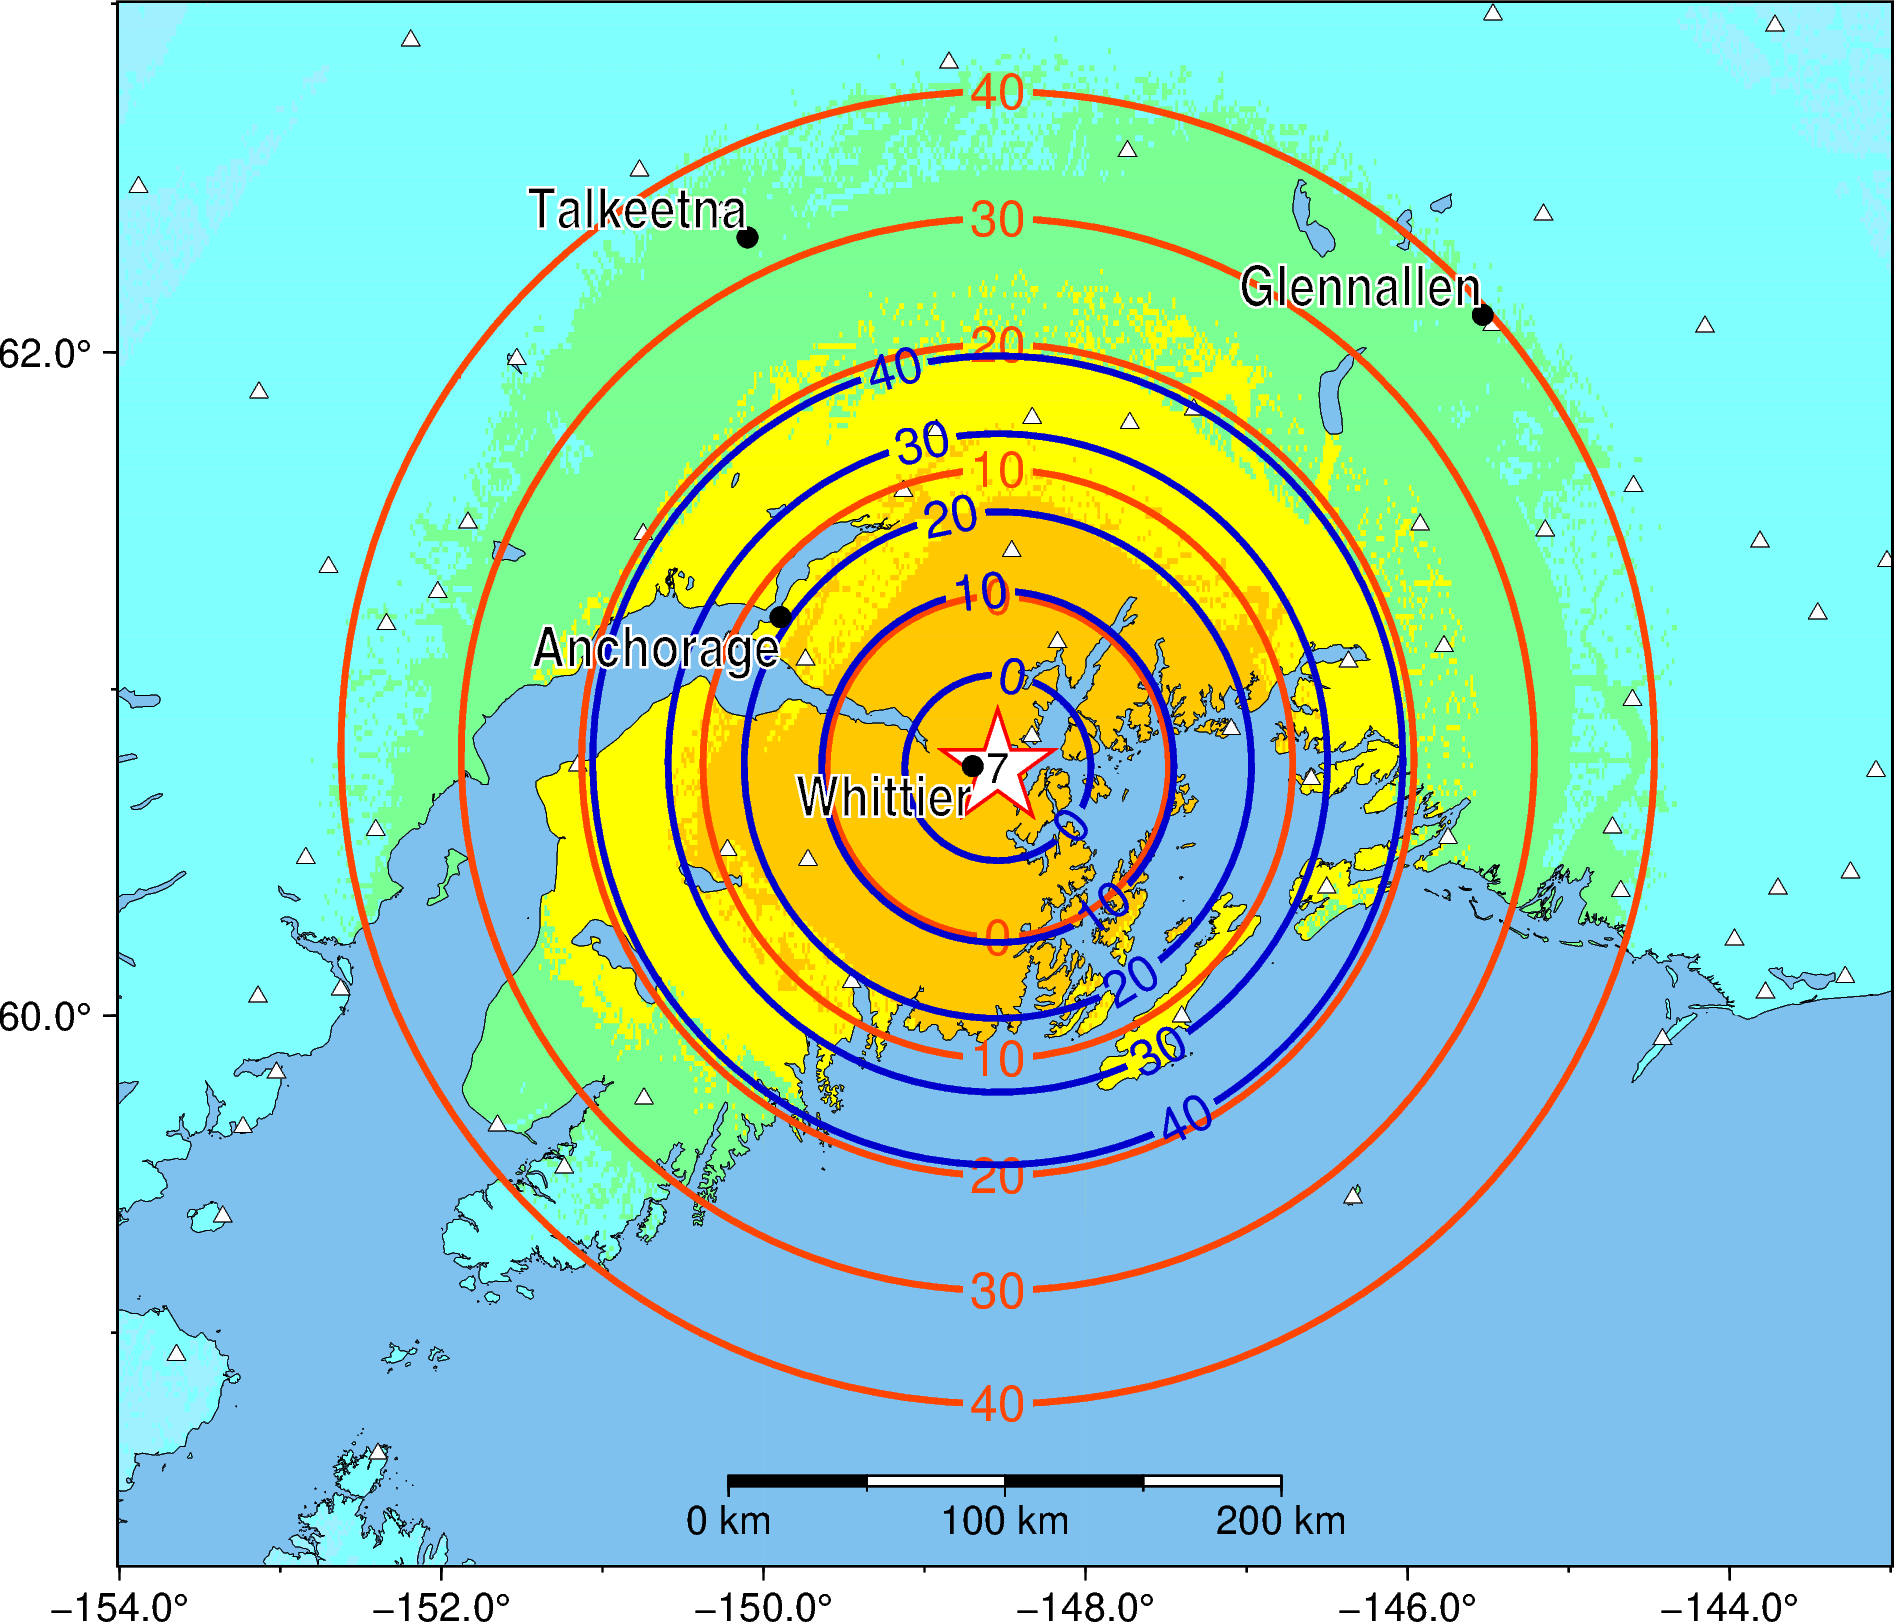

In [32]:

cpt = pygmt.makecpt(cmap="Data/mmi.cpt", series=[1, 11])
# title = r"Anchorage 2018 Estimated WT"
bounds = '206/58.25/217/63+r'
coast_border = "a/0.25p,black"
shorelines = "0.1p,black"
# frame = ["a", f'WSne+t"{title}"']
# relief = pygmt.datasets.load_earth_relief(resolution="03s", region=[206, 215, 59, 63.5], registration='gridline')
levels = '-20,-10,0,10,20,30,40'
anno = levels + '+f12p'
starsize = 1.0
numsize = 0.35
ruptpen = 0.5
starpen = 0.75
planes = {}
for k, eq in eq_dict.items():
    line_lon = eq.event['lon']
    line_lonleft = eq.event['lon'] - 4
    line_lonright = eq.event['lon'] + 4
    line_toplat = eq.event['lat']  + 5
    line_botlat = eq.event['lat'] - 5
    fig = pygmt.Figure()
    # fig.basemap(region=[160, 240, 40, 75], projection='M15c', frame=True)
    fig.basemap(region=bounds, projection='M15c')
    fig.coast(shorelines=shorelines, borders=coast_border, water='skyblue2',
              land='gainsboro')  # draw coast over datawater='skyblue'
    # fig.grdimage(grid=relief, projection='M15c', region=bounds, cmap='gray')
    fig.plot(x=eq.lons.flat,
             y=eq.lats.flat,
             color=eq.mmi.flat,
             cmap=True,
             style='r.024/.047c',
             )

    fig.coast(shorelines=shorelines, water='skyblue2', map_scale='n0.5/0.05+w200+f+u')  # draw coast over data
    fig.plot(  # Plot seismic stations as triangles
        x=uf.ActiveBBs['lon'],
        y=uf.ActiveBBs['lat'],
        style='t+0.18c',
        color='white',
        pen='0.1p,black',
    )
    fig.plot(x=eq.event['lon'],
             y=eq.event['lat'],
             style=f'a{starsize}c',
             color='white',
             pen=f'{starpen}p,red')
    fig.plot(
        x=eq.event['lon'],
        y=eq.event['lat'],
        style=f'l{numsize}c+t"{k}"',
        color='black'
    )
    #fast
    fig.contour(x=eq.lons.flat,
                y=eq.lats.flat,
                z=eq.warning_times_s.flat,
                projection='M15c',
                region=bounds,
                # levels=levels,
                annotation=anno,
                pen='1.5,orangered1',
                label_placement=f'l{line_lon}/{line_toplat}/{line_lon}/{line_botlat}'
                )
    
    #slow
    fig.contour(x=eq.lons.flat,
                y=eq.lats.flat,
                z=eq.warning_times_slow.flat,
                projection='M15c',
                region=bounds,
                # levels=levels,
                pen='1.5,mediumblue',
                annotation=anno,
                label_placement=f'l{line_lonleft}/{line_toplat}/{line_lonright}/{line_botlat}'
                )
    
    # plot communities
    for name, data in comm_dict.items():
        fig.plot(
            x=data['latlon'][1],
            y=data['latlon'][0],
            style='c0.18c',
            color='black'
        )
        if name.lower() in ['anchorage', 'whittier']:
            if int(k) in [5,7]:
                corner = 'TR'
                adjust = -0.025
        else:
            corner = 'BR'
            adjust = 0.025
        fig.text(
            x=data['latlon'][1],
            y=data['latlon'][0] + adjust,
            text=name,
            font='14p,Helvetica-Narrow-Bold,black,=0.45p,white',
            justify=corner
        )

    # fig.colorbar(position="JBC+o1c/0c+w10c/0.3c+mc")
    fig.savefig(f'Figures/Down Dip/WT Contours/{k}_map_ranges.pdf', dpi=700)
    fig.savefig(f'Figures/Down Dip/WT Contours/{k}_map_ranges.png', dpi=700)
    fig.show()